In [ ]:
# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Dataset

- crim: Per capita crime rate by town.
- zn: Proportion of large residential lots (over 25,000 sq. ft.).
- indus: Proportion of non-retail business acres per town.
- Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
- nox: Concentration of nitrogen oxides in the air.
- rm: Average number of rooms per dwelling.
- age: Proportion of old owner-occupied units built before 1940.
- dis: Weighted distances to Boston employment centers.
- rad: Index of accessibility to radial highways.
- tax: Property tax rate per $10,000.

In [14]:
df = pd.read_csv("BostonHousing.csv")
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [22]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [48]:
df.dropna(inplace=True)

In [ ]:
# EDA

Text(0.5, 1.0, 'Distribution of House Prices (medv)')

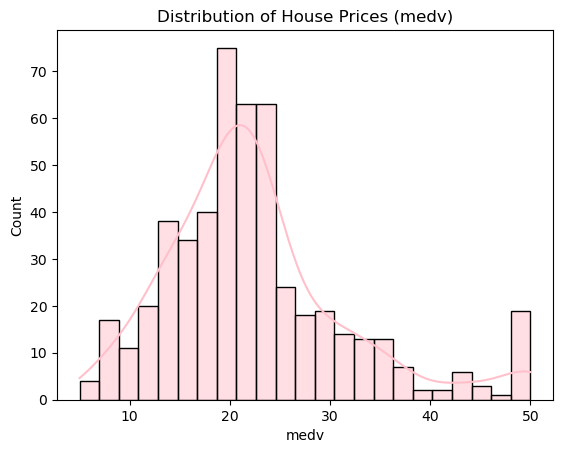

In [30]:
# Distribution of Target Variable
sns.histplot(df["medv"], kde=True,color="pink" )
plt.title("Distribution of House Prices (medv)")

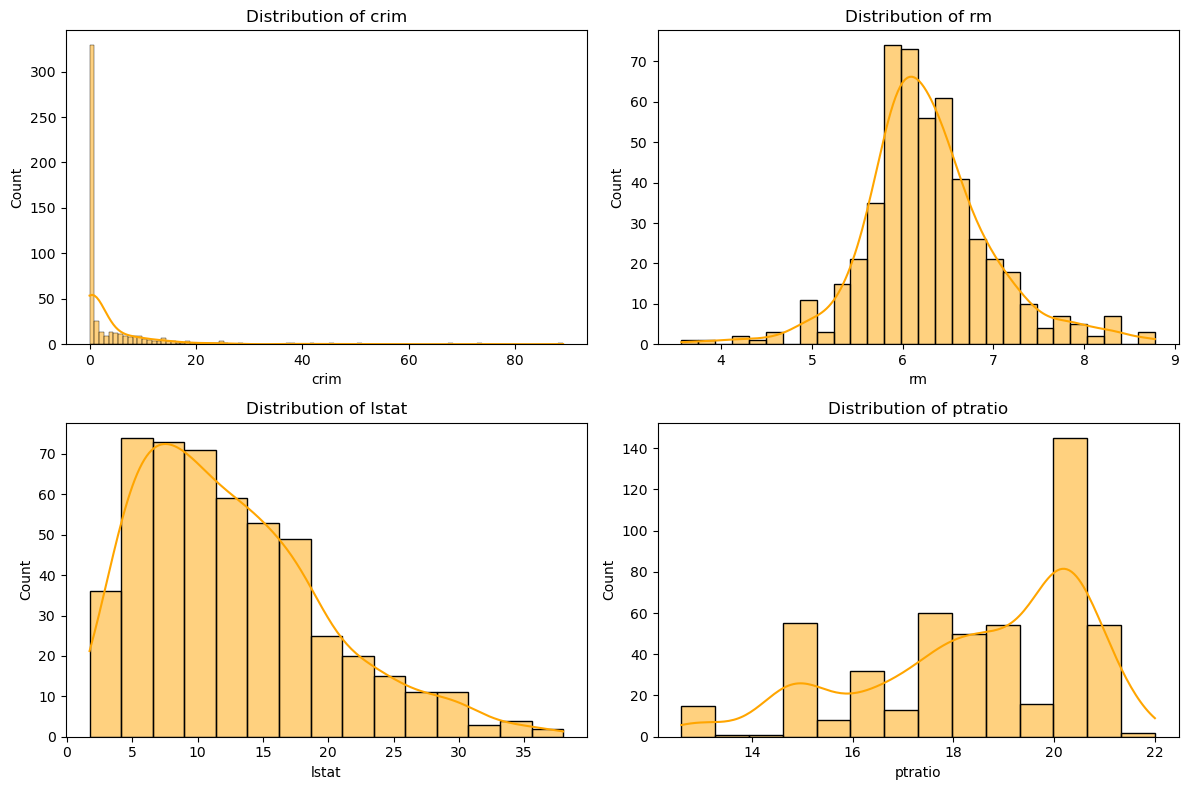

In [44]:
# Histogram for other Numerical Features
features = ['rm', 'lstat', 'ptratio']
plt.figure(figsize=(12,8))

for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

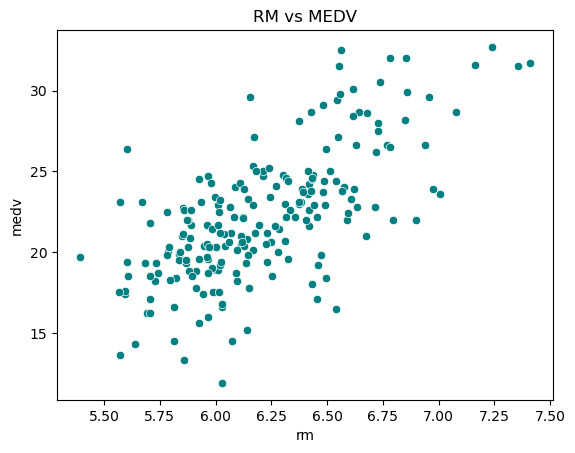

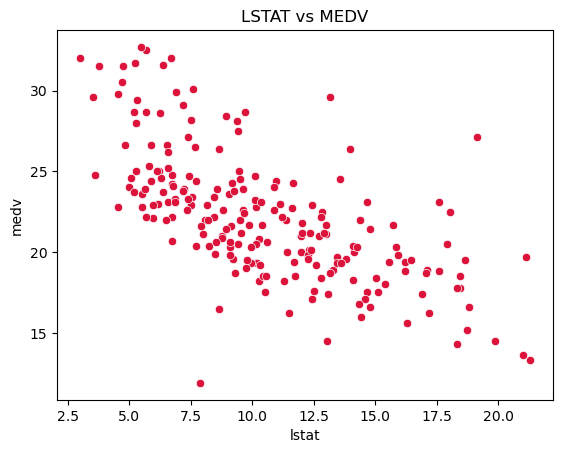

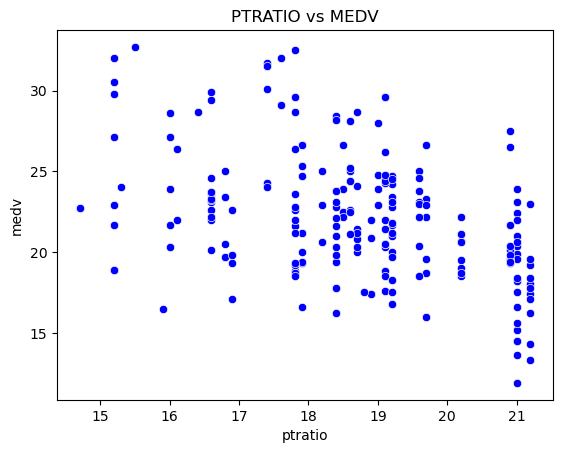

In [68]:
# Feature VS House Price

# RM vs MEDV (average rooms)
sns.scatterplot(x='rm', y='medv', data=df, color='teal')
plt.title("RM vs MEDV")
plt.show()

# LSTAT vs MEDV (% lower status population)
sns.scatterplot(x='lstat', y='medv', data=df, color='crimson')
plt.title("LSTAT vs MEDV")
plt.show()

# PTRATIO vs MEDV (pupil-teacher ratio)
sns.scatterplot(x='ptratio', y='medv', data=df, color='blue')
plt.title("PTRATIO vs MEDV")
plt.show()


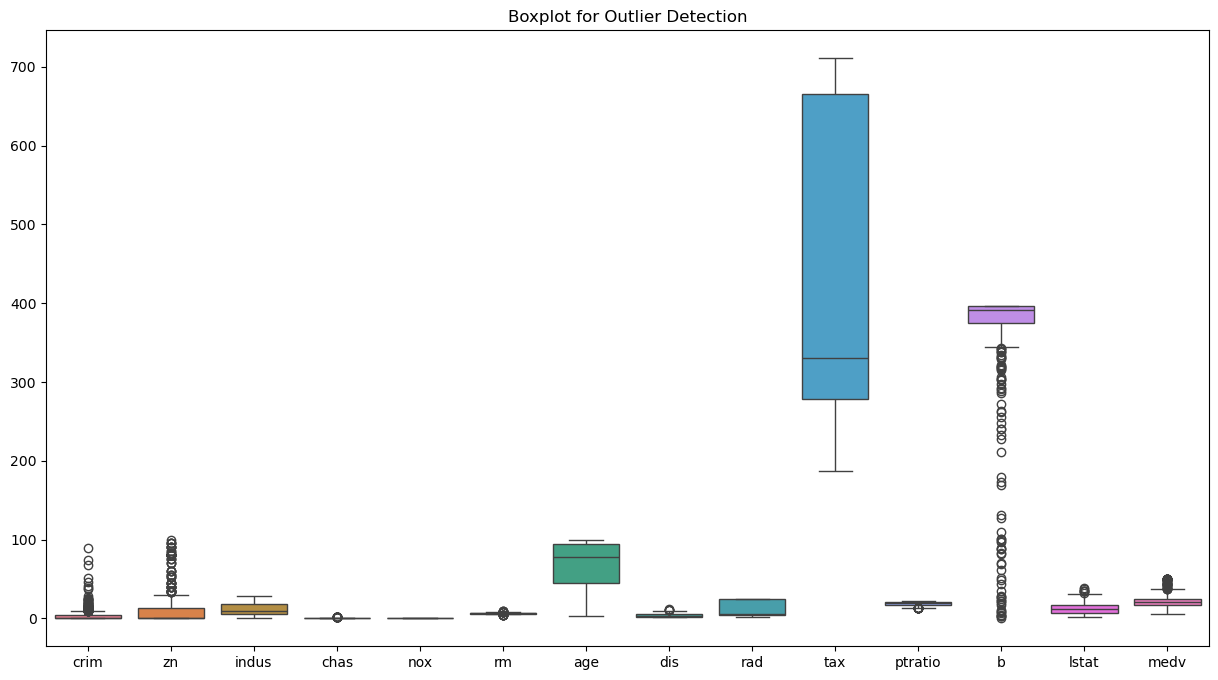

In [54]:
# Boxplot - Outlier Detection
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [58]:
# Removing Outliers
# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


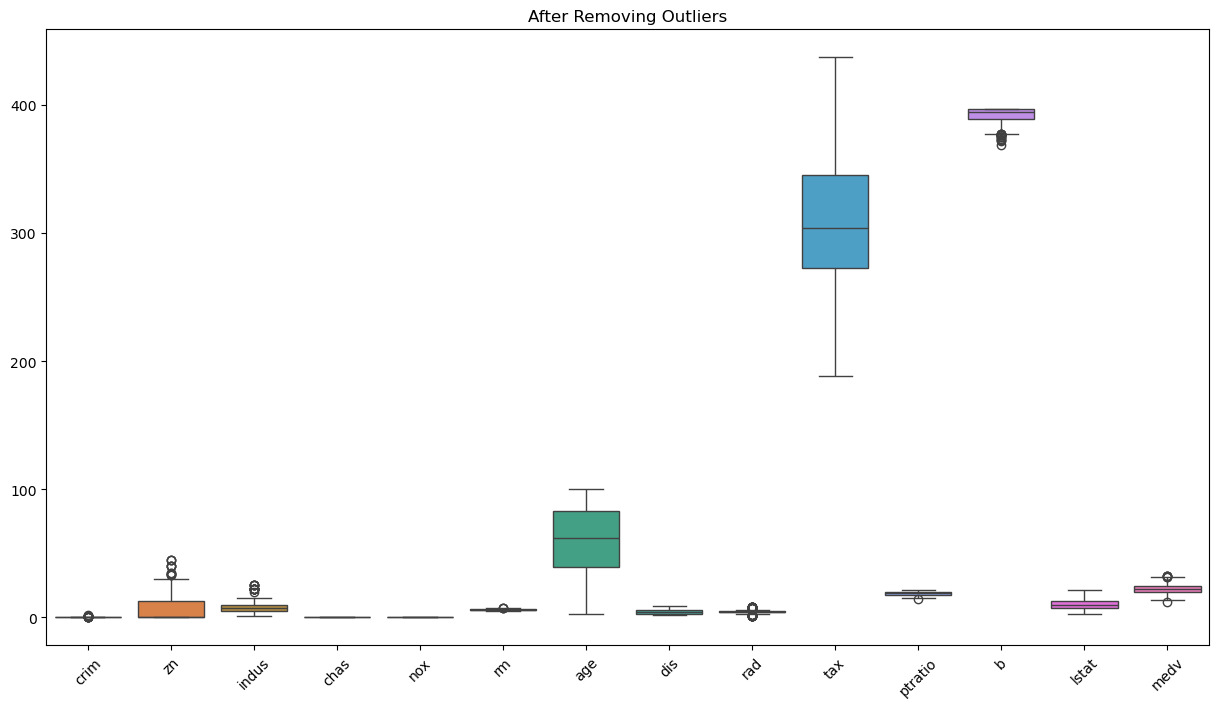

In [60]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.title("After Removing Outliers")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Train/Test Model

In [62]:
x = df[["rm","lstat","ptratio"]]
y = df["medv"]

# Data Preparation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

# Model Train
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

# Making Predictions And Evaluation
y_pred = model.predict(x_test)

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Absolute Error: 1.7984132062320528
Mean Squared Error: 6.076299863670148
Root Mean Squared Error: 2.465015185281857
R² Score: 0.6152160059737609
